In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import func_plot as fp
import scipy.stats as ss
from statsmodels.regression.linear_model import OLS
from sklearn.metrics import mean_squared_error as mae

In [2]:
mmp_fsLR = np.loadtxt('../../src/fs_LR.64k.mmp_360.txt')
ratio = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
max_mode = 100
sub_list = np.loadtxt('../../sub_list.txt', dtype='str')
n = len(sub_list)
sub_list

array(['s003', 's007', 's012', 's014', 's017', 's020', 's023', 's025',
       's026', 's028', 's029', 's030', 's031', 's032', 's033', 's034',
       's035', 's036', 's037', 's038'], dtype='<U4')

In [3]:
gradient = [ss.zscore(np.loadtxt('../../results/grad/individual/'+sub+'/grad_sparsity_0.9_fsLR_mmp_raw.txt'),axis=0) for sub in sub_list]
lambdas = [np.loadtxt('../../results/grad/individual/'+sub+'/lambdas_sparsity_0.9_fsLR_mmp.txt') for sub in sub_list]

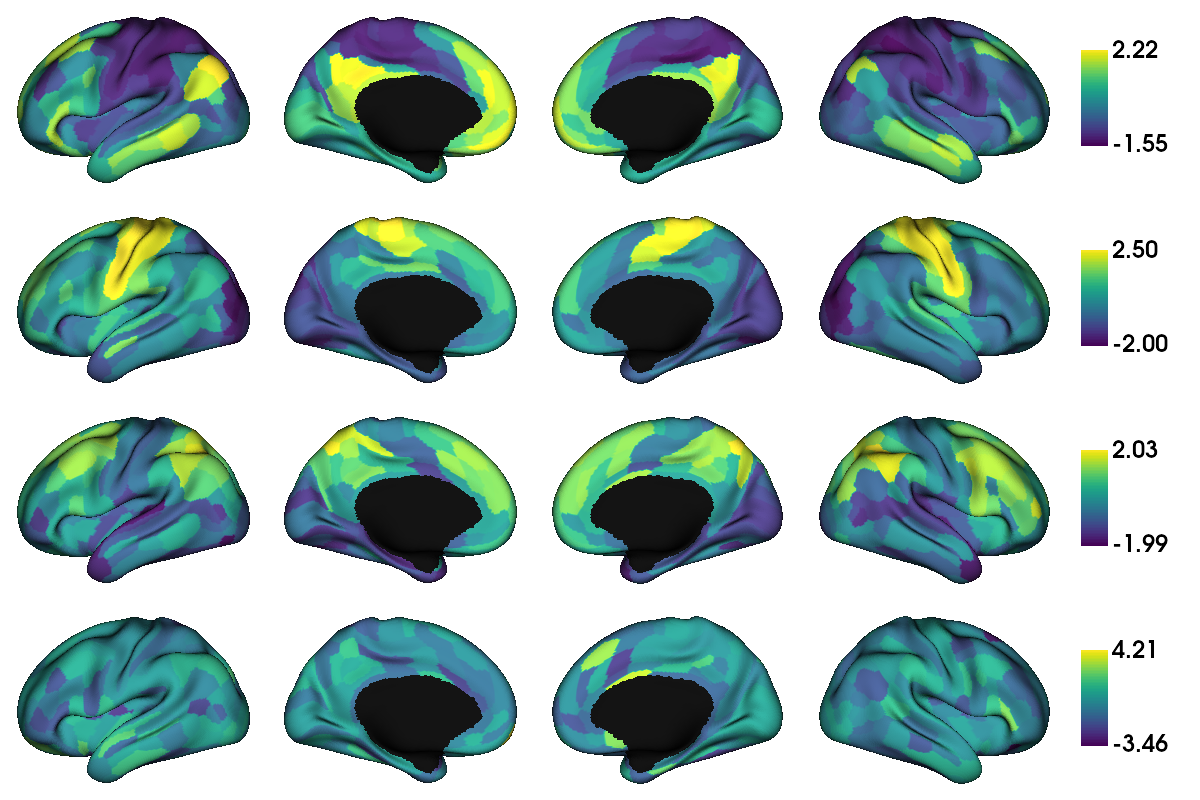

In [4]:
spa = [0,1,2,99]
sub=10
plot = [None] * 4
for i in range(4):
  plot[i] = mmp_fsLR.copy()
  for node in range(360):
    plot[i][mmp_fsLR==node+1] = gradient[sub][:,spa[i]][node]
  plot[i][mmp_fsLR==0] = np.nan

fp.plot_surface(data = plot, surf='fsLR',
                size = (1200, 800), 
                cmap = 'viridis', filename = '../../figures/sub_'+sub_list[sub]+'_grad_fsLR_mmp_sparsity_0.9.png',
                display=True)

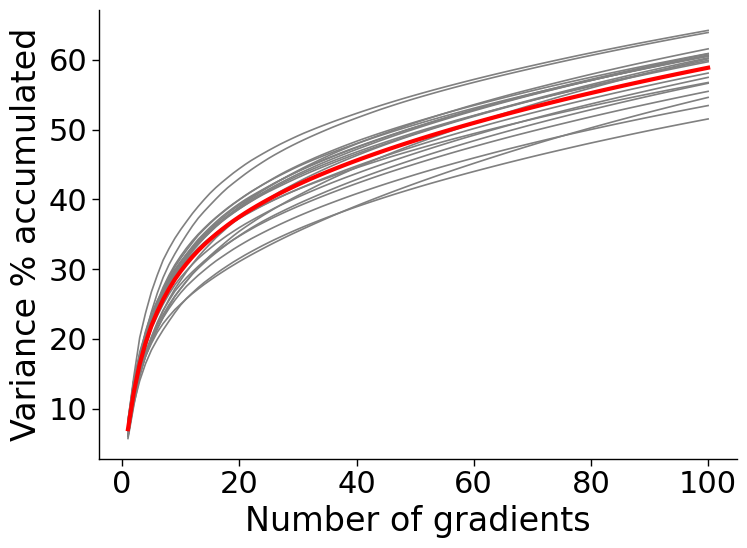

In [5]:
lambdas_acc = np.zeros((n,100))
for i in range(100):
  for j in range(n):
    lambdas_acc[j,i] = lambdas[j][:i+1].sum() * 100
sns.set_context("paper", font_scale = 2.5)
fig, ax = plt.subplots(figsize=(8,6))
for i in range(n):
  plt.plot(range(1,101),lambdas_acc[i], color='grey')

ax.plot(range(1,101),lambdas_acc.mean(axis=0),lw=3,color='red')

ax.set_xlabel('Number of gradients')
ax.set_ylabel('Variance % accumulated')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
fig.savefig('../../figures/indi_lambdas_fsLR_mmp.png', transparent=True, dpi=300)

In [6]:
glucose = np.zeros((n,360))
glucose_asy = np.zeros((n,180))
for i in range(n):
  glucose_raw = np.loadtxt('../../results/glucose/individual/'+sub_list[i]+'_fsLR_mmp.txt')
  glucose_l = ss.zscore(glucose_raw[:180])
  glucose_r = ss.zscore(glucose_raw[180:])
  glucose[i] = np.concatenate((glucose_l, glucose_r))
  glucose_asy[i] = glucose_l - glucose_r

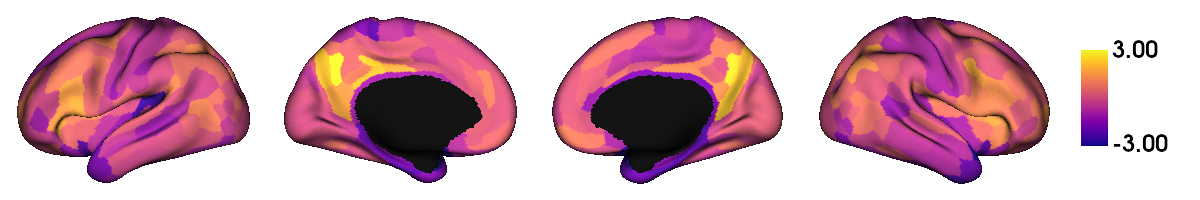

In [7]:
sub=10
plot = mmp_fsLR.copy()
for node in range(360):
  plot[mmp_fsLR==node+1] = glucose[sub][node]
plot[mmp_fsLR==0] = np.nan
    
fp.plot_surface(data = plot, surf='fsLR',
                size = (1200, 200), color_range=(-3,3),
                cmap = 'plasma', filename = '../../figures/sub_'+sub_list[sub]+'_CMRglc_mean_fsLR_mmp.png',
                display=True)

In [8]:
corr = np.zeros((n,max_mode))
for i in range(n):
  for j in range(max_mode):
    glm = OLS(glucose[i], gradient[i][:,:j+1]).fit()
    corr[i,j]=glm.rsquared_adj

s003_r2 = 0.56108
s007_r2 = 0.37466
s012_r2 = 0.56937
s014_r2 = 0.38733
s017_r2 = 0.36315
s020_r2 = 0.51112
s023_r2 = 0.32744
s025_r2 = 0.41833
s026_r2 = 0.35285
s028_r2 = 0.47721
s029_r2 = 0.43775
s030_r2 = 0.55575
s031_r2 = 0.49922
s032_r2 = 0.3506
s033_r2 = 0.45087
s034_r2 = 0.5242
s035_r2 = 0.52352
s036_r2 = 0.28622
s037_r2 = 0.47629
s038_r2 = 0.39654
mean_r2 = 0.44218  std_r2 = 0.08288


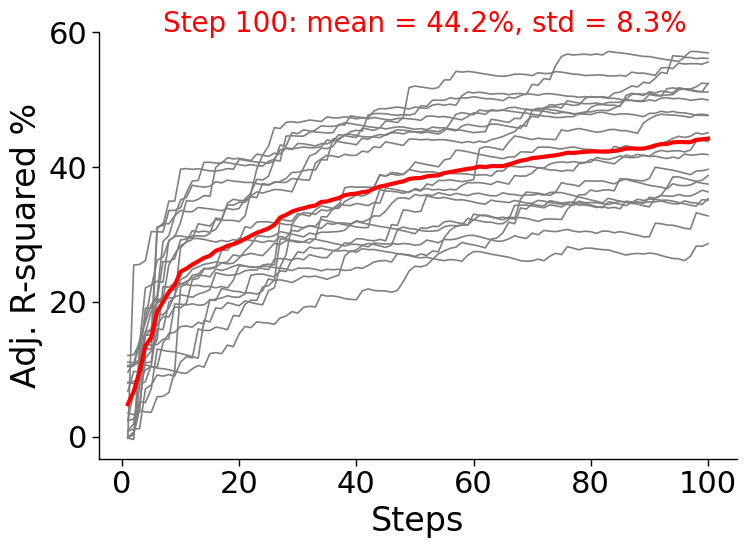

In [9]:
sns.set_context("paper", font_scale = 2.5)
fig, ax = plt.subplots(figsize=(8,6))
for i in range(n):
  ax.plot(range(1,max_mode+1), corr[i]*100, color='grey')
  print(sub_list[i]+'_r2 =', corr[i][99].round(5))

ax.plot(range(1,max_mode+1), corr.mean(axis=0)*100, color='red', lw=3)
print('mean_r2 =', corr[:,99].mean().round(5), ' std_r2 =', corr[:,99].std().round(5))

ax.set_xlabel('Steps')
ax.set_ylabel('Adj. R-squared %')
ax.text(0.1,1,'Step 100: mean = '+str(corr[:,99].mean().round(3)*100)+'%, std = '+str(corr[:,99].std().round(3)*100)+'%',
        fontsize=20, transform=ax.transAxes, color='red')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
fig.savefig('../../figures/indi_fitting_fsLR_mmp.png', transparent=True, dpi=300)

In [10]:
sub_corr = np.zeros(n)
for i in range(n):
  sub_corr[i] = mae(lambdas_acc[i]/100, corr[i]) 
  print(sub_list[i]+'_MAE =', sub_corr[i])

s003_MAE = 0.0009769512230539434
s007_MAE = 0.07097623901147192
s012_MAE = 0.001858481714347144
s014_MAE = 0.03699585643138836
s017_MAE = 0.01493710357299975
s020_MAE = 0.005015097219307945
s023_MAE = 0.029930324181139688
s025_MAE = 0.0181157744588055
s026_MAE = 0.02761780060291947
s028_MAE = 0.02070951674382702
s029_MAE = 0.009487141483871586
s030_MAE = 0.001037665413566708
s031_MAE = 0.0019530135803048708
s032_MAE = 0.0305792732924882
s033_MAE = 0.03667128786074504
s034_MAE = 0.000539331891536006
s035_MAE = 0.005021609241022145
s036_MAE = 0.04879722221985634
s037_MAE = 0.0012943217466187924
s038_MAE = 0.02735301025215225


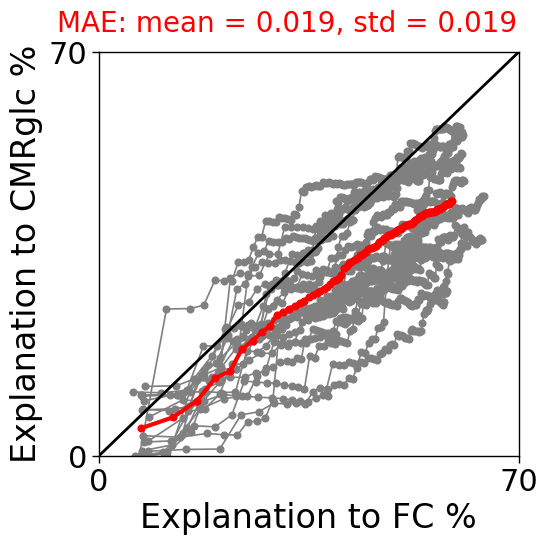

In [11]:
sns.set_context("paper", font_scale = 2.5)
fig, ax = plt.subplots(figsize=(6,6))
for i in range(n):
  ax.plot(lambdas_acc[i],corr[i]*100,marker='o',color='grey')

ax.plot(lambdas_acc.mean(axis=0),corr.mean(axis=0)*100,marker='o',lw=3,color='red') 

ax.text(-0.1,1.05,'MAE: mean = '+str(sub_corr.mean().round(3))+', std = '+str(sub_corr.std().round(3)),
        fontsize=20, transform=ax.transAxes, color='red')

ax.set_yticks([0,70])
ax.set_xticks([0,70])
ax.set_ylim(0,70)
ax.set_xlim(0,70)
ax.set_xlabel('Explanation to FC %')
ax.set_ylabel('Explanation to CMRglc %')
ax.plot([0,70], [0,70], c='black', ls='-', lw=2)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
fig.tight_layout()
fig.savefig('../../figures/indi_variance_r2_fsLR_mmp.png', transparent=True, dpi=300)

# ASYMMETRY

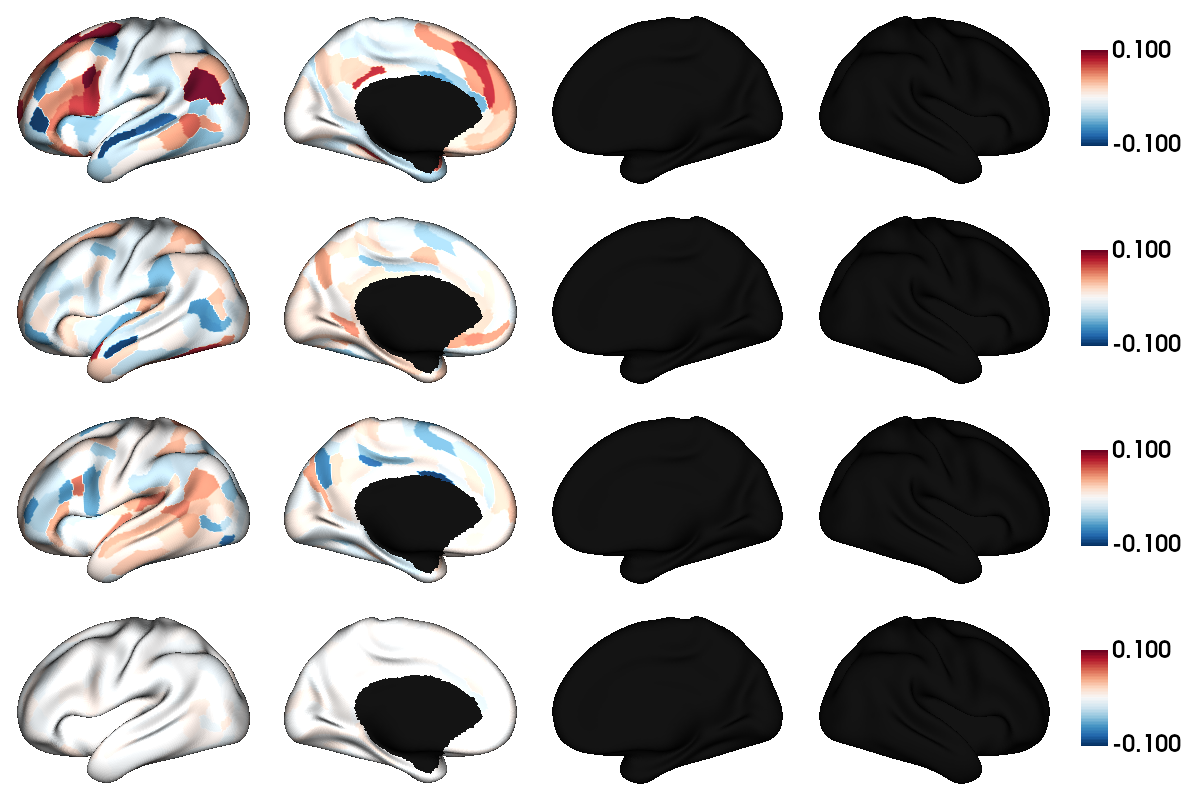

In [12]:
lhlh = [np.loadtxt('../../results/grad/asymmetryRefLH/'+sub_list[i]+'/grad_sparsity_0.9_fsLR_mmp_lh_aligned.txt') for i in range(n)]
rhrh = [np.loadtxt('../../results/grad/asymmetryRefLH/'+sub_list[i]+'/grad_sparsity_0.9_fsLR_mmp_rh_aligned.txt') for i in range(n)]
grad_asy = np.array(lhlh) - np.array(rhrh)
spa = [0,1,2,99]
grad_asy_plot = np.concatenate((grad_asy, np.zeros((n,180,100))),axis=1)
plot = [None] * 4
sub=10
for i in range(4):
  plot[i] = mmp_fsLR.copy()
  for node in range(360):
    plot[i][mmp_fsLR==node+1] = grad_asy_plot[sub][:,spa[i]][node]
  plot[i][plot[i]==0] = np.nan

fp.plot_surface(data = plot, surf='fsLR', color_range=(-0.1,0.1),
                size = (1200, 800), 
                cmap = 'RdBu_r', filename = '../../figures/sub_'+sub_list[sub]+'_asy_grad_fsLR_mmp_sparsity_0.9.png',
                display=True)

In [13]:
#  Left for right
r_ll = np.zeros((n,max_mode))
r_lr = np.zeros((n,max_mode))
r_ll_pred = np.zeros((n,max_mode,180))
r_lr_pred = np.zeros((n,max_mode,180))
for i in range(n):
  for j in range(max_mode):
    glm = OLS(glucose[i,:180], lhlh[i][:,:j+1]).fit()
    r_ll_pred[i,j] = glm.predict(lhlh[i][:180,:j+1])
    r_ll[i,j]=np.corrcoef(glucose[i,:180], r_ll_pred[i,j])[0,1]
    r_lr_pred[i,j] = glm.predict(rhrh[i][:,:j+1])
    r_lr[i,j]=np.corrcoef(glucose[i,180:], r_lr_pred[i,j])[0,1]

In [14]:
#  Right for Left
r_rl = np.zeros((n,max_mode))
r_rr = np.zeros((n,max_mode))
r_rl_pred = np.zeros((n,max_mode,180))
r_rr_pred = np.zeros((n,max_mode,180))
for i in range(n):
  for j in range(max_mode):
    glm = OLS(glucose[i,180:], rhrh[i][:,:j+1]).fit()
    r_rr_pred[i,j] = glm.predict(rhrh[i][:,:j+1])
    r_rr[i,j]=np.corrcoef(glucose[i,180:], r_rr_pred[i,j])[0,1]
    r_rl_pred[i,j] = glm.predict(lhlh[i][:,:j+1])
    r_rl[i,j]=np.corrcoef(glucose[i,:180], r_rl_pred[i,j])[0,1]

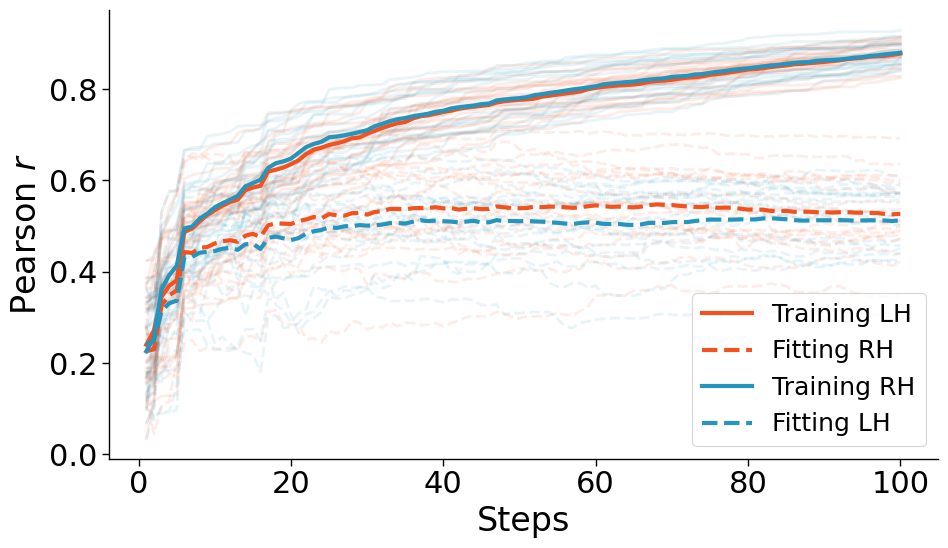

In [15]:
sns.set_context("paper", font_scale = 2.5)
fig, ax = plt.subplots(figsize=(10,6))
for i in range(20):
  ax.plot(range(1,max_mode+1), r_ll[i], c=fp.red, lw=2, alpha=0.1)
  ax.plot(range(1,max_mode+1), r_lr[i], c=fp.red, ls='--', lw=2, alpha=0.1)
  ax.plot(range(1,max_mode+1), r_rr[i], c=fp.blue, lw=2, alpha=0.1)
  ax.plot(range(1,max_mode+1), r_rl[i], c=fp.blue, ls='--', lw=2, alpha=0.1)
ax.plot(range(1,max_mode+1), r_ll.mean(0), label='Training LH', c=fp.red, lw=3)
ax.plot(range(1,max_mode+1), r_lr.mean(0), label='Fitting RH', c=fp.red, ls='--', lw=3)
ax.plot(range(1,max_mode+1), r_rr.mean(0), label='Training RH', c=fp.blue, lw=3)
ax.plot(range(1,max_mode+1), r_rl.mean(0), label='Fitting LH', c=fp.blue, ls='--', lw=3)
ax.set_xlabel('Steps')
ax.set_ylabel('Pearson $\it{r}$')
ax.set_xticks([0,20,40,60,80,100])
plt.legend(fontsize=18)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
fig.savefig('../../figures/indi_fitting_gray_fsLR_mmp.png', transparent=True, dpi=300)

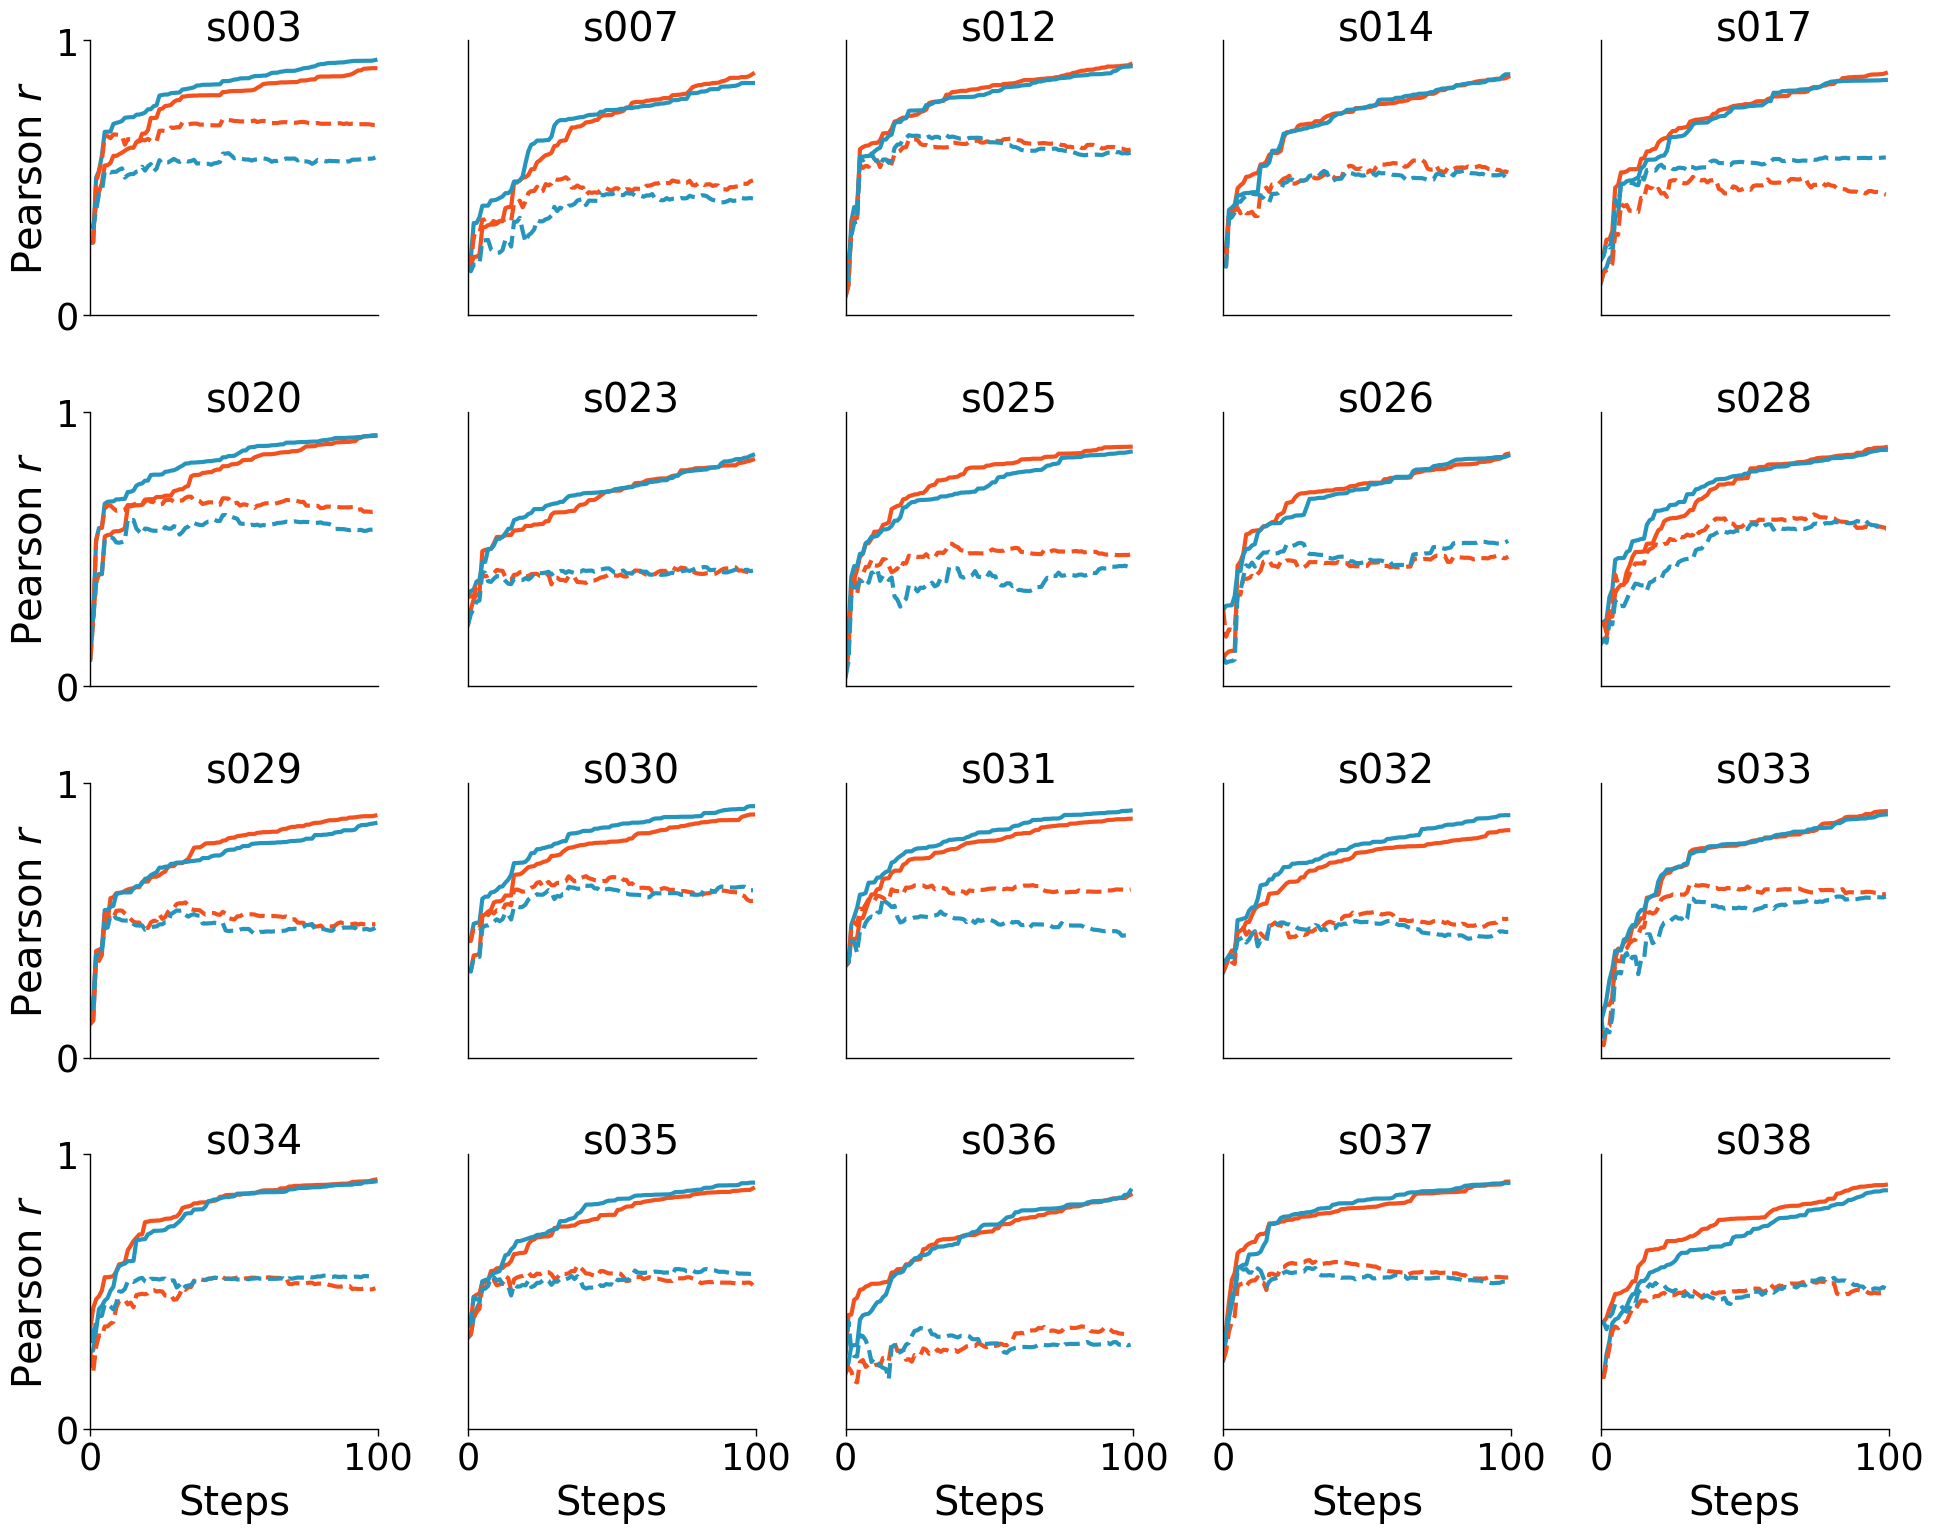

In [16]:
sns.set_context("paper", font_scale = 3)
fig, ax = plt.subplots(4,5,figsize=(20,16))
for i in range(4):
  for j in range(5):
    ax[i,j].plot(range(max_mode), r_ll.reshape(4,5,max_mode)[i,j], c=fp.red, lw=3)
    ax[i,j].plot(range(max_mode), r_rr.reshape(4,5,max_mode)[i,j], c=fp.blue, lw=3)
    ax[i,j].plot(range(max_mode), r_lr.reshape(4,5,max_mode)[i,j], c=fp.red, ls='--', lw=3)
    ax[i,j].plot(range(max_mode), r_rl.reshape(4,5,max_mode)[i,j], c=fp.blue, ls='--', lw=3)
    ax[i,j].set_xlim(0,100)
    ax[i,j].set_ylim(0,1) 
    ax[i,j].text(0.4,1, sub_list.reshape(4,5)[i,j], transform=ax[i,j].transAxes, color='black')
    ax[i,j].spines['right'].set_visible(False)
    ax[i,j].spines['top'].set_visible(False)
    ax[i,j].set_xticks([])
    ax[i,j].set_yticks([])

for i in range(5):
  ax[3,i].set_xticks([0,100])
  ax[3,i].set_xlabel('Steps')
for j in range(4):
  ax[j,0].set_yticks([0,1])
  ax[j,0].set_ylabel('Pearson $\it{r}$')

fig.tight_layout()
fig.savefig('../../figures/indi_fitting_fsLR_mmp.png', transparent=True, dpi=300)

In [17]:
r_asy = np.zeros((n,max_mode))
r2_adj = np.zeros((n,max_mode))
corr_pred = np.zeros((n,max_mode,180))
for i in range(n):
  for j in range(max_mode):
    glm = OLS(glucose_asy[i], grad_asy[i][:,:j+1]).fit()
    r2_adj[i,j] = glm.rsquared_adj
    corr_pred[i,j] = glm.predict(grad_asy[i][:,:j+1])
    r_asy[i,j]=np.corrcoef(glucose_asy[i], corr_pred[i,j])[0,1]

In [18]:
r2_adj.mean(0).max(), np.where(r2_adj.mean(0)==r2_adj.mean(0).max())

(0.03326841739619387, (array([18]),))

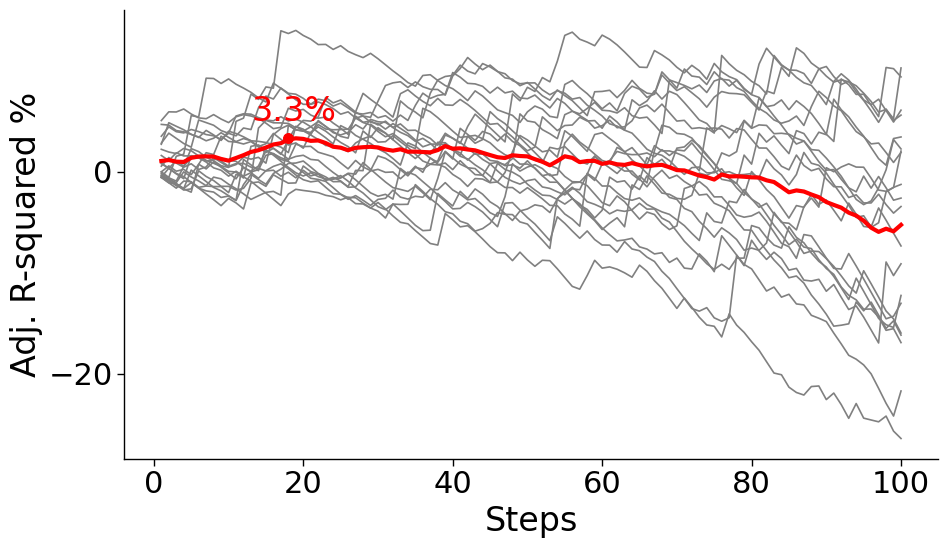

In [19]:
sns.set_context("paper", font_scale = 2.5)
fig, ax = plt.subplots(figsize=(10,6))
for i in range(n):
  ax.plot(range(1,max_mode+1), r2_adj[i]*100, color='gray')
ax.plot(range(1,max_mode+1), r2_adj.mean(0)*100, c='red',lw=3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Adj. R-squared %')
ax.set_yticks([-40,-20,0,20])
ax.set_xlabel('Steps')
ax.scatter(18, r2_adj.mean(0)[18]*100, color='red', s=50, zorder=4)
ax.text(13,5,str((r2_adj.mean(0).max()*100).round(1))+'%', color='red')
fig.tight_layout()
fig.savefig('../../figures/indi_fitting_asy_sparsity_0.9_fsLR_mmp.png', transparent=True, dpi=300)

In [20]:
comp=np.zeros((n,max_mode))
late = np.zeros((n,max_mode))
for i in range(n):
  for j in range(max_mode):
    asy = r_ll_pred[i][j] - r_rr_pred[i][j]
    comp[i,j] = np.cov(glucose_asy[i],asy)[0,1]
    asy = corr_pred[i][j]
    late[i,j] = np.cov(glucose_asy[i],asy)[0,1]

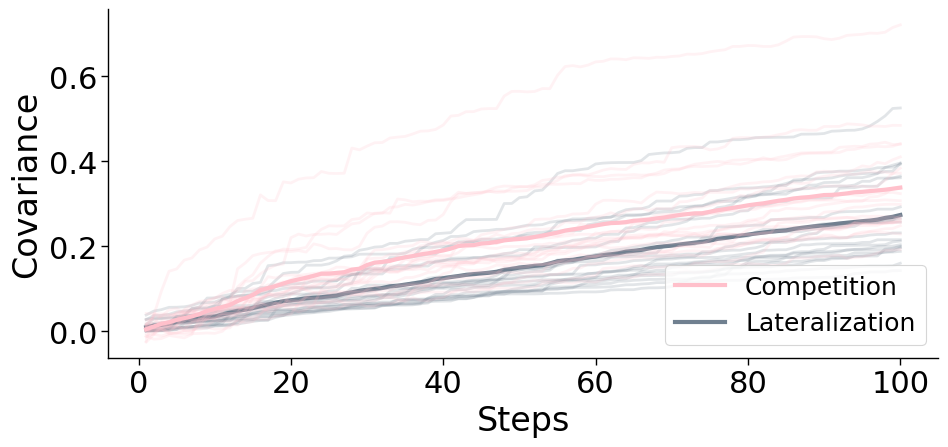

In [21]:
sns.set_context("paper", font_scale = 2.5)
fig, ax = plt.subplots(figsize=(10,5))
i=9

for sub in range(n):
  ax.plot(range(1,101), comp[sub], c='pink', zorder=1, alpha=0.2, lw=2)
  ax.plot(range(1,101), late[sub], c='slategray', zorder=0, alpha=0.2, lw=2)

ax.plot(range(1,101), comp.mean(0), c='pink', zorder=1, alpha=1, lw=3, label='Competition')
ax.plot(range(1,101), late.mean(0), c='slategray', zorder=0, alpha=1, lw=3, label='Lateralization')

ax.set_ylabel('Covariance')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Steps')
plt.legend(loc='lower right', fontsize=18)
fig.tight_layout()
fig.savefig('../../figures/indi_fitting_latvscomp_sparsity_0.'+str(i)+'_fsLR_mmp.png', transparent=True, dpi=300)

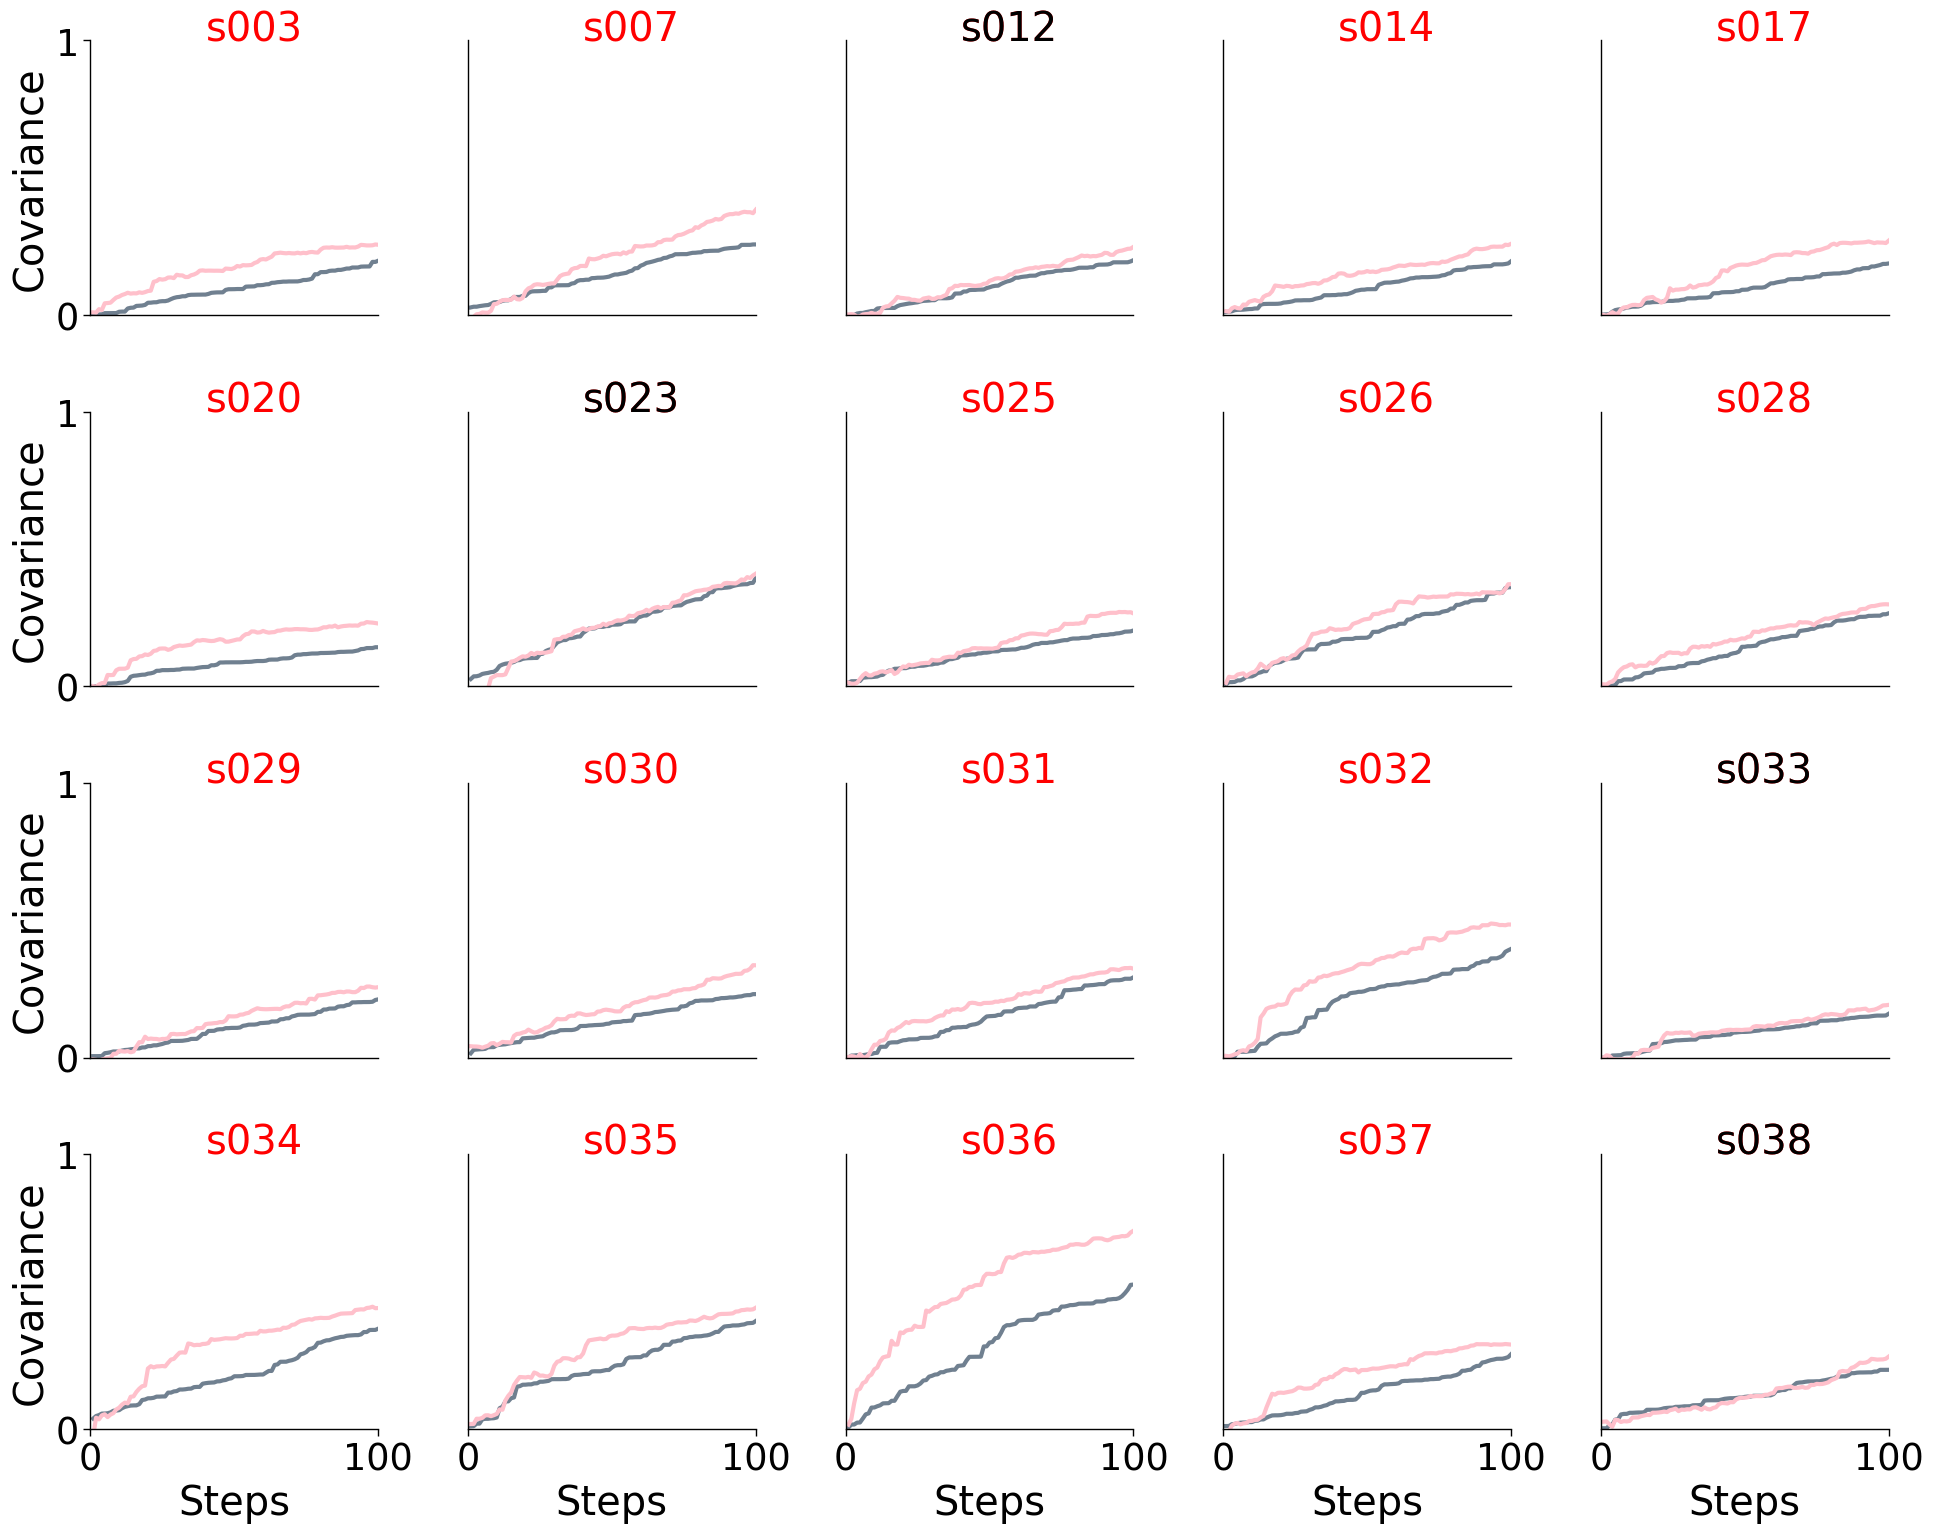

In [22]:
sns.set_context("paper", font_scale = 3)
fig, ax = plt.subplots(4,5,figsize=(20,16))
for i in range(4):
  for j in range(5):
    ax[i,j].plot(range(1,101), comp.reshape(4,5,max_mode)[i,j], c='pink', zorder=1, alpha=1, lw=3)
    ax[i,j].plot(range(1,101), late.reshape(4,5,max_mode)[i,j], c='slategray', zorder=0, alpha=1, lw=3)
    ax[i,j].text(0.4,1, sub_list.reshape(4,5)[i,j], transform=ax[i,j].transAxes, color='red')
    ax[i,j].set_xlim(0,100)
    ax[i,j].set_ylim(0,1)
    ax[i,j].set_xticks([])
    ax[i,j].set_yticks([])
    ax[i,j].spines['right'].set_visible(False)
    ax[i,j].spines['top'].set_visible(False)
for i in range(5):
  ax[3,i].set_xticks([0,100])
  ax[3,i].set_xlabel('Steps')
for j in range(4):
  ax[j,0].set_yticks([0,1])
  ax[j,0].set_ylabel('Covariance')

ax[0,2].text(0.4,1, sub_list.reshape(4,5)[0,2], transform=ax[0,2].transAxes, color='black')
ax[1,1].text(0.4,1, sub_list.reshape(4,5)[1,1], transform=ax[1,1].transAxes, color='black')
ax[2,4].text(0.4,1, sub_list.reshape(4,5)[2,4], transform=ax[2,4].transAxes, color='black')
ax[3,4].text(0.4,1, sub_list.reshape(4,5)[3,4], transform=ax[3,4].transAxes, color='black')

fig.tight_layout()
fig.savefig('../../figures/indiindi_fitting_asy_sparsity_0.9_fsLR_mmp.png', transparent=True, dpi=300)